In [1]:
import sys
import torch  
import gym
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
# Constants
GAMMA = 0.9

class PolicyNetwork(nn.Module):
    def __init__(self, num_inputs, num_actions, hidden_size, learning_rate=3e-4):
        super(PolicyNetwork, self).__init__()

        self.num_actions = num_actions
        self.linear1 = nn.Linear(num_inputs, hidden_size)
        self.linear2 = nn.Linear(hidden_size, num_actions)
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, state):
        x = F.relu(self.linear1(state))
        x = F.softmax(self.linear2(x), dim=1)
        return x 
    
    def get_action(self, state):
        state = torch.from_numpy(state).float().unsqueeze(0)
        probs = self.forward(Variable(state))
        #Choose action with regard to policy
        highest_prob_action = np.random.choice(self.num_actions, p=np.squeeze(probs.detach().numpy()))
        log_prob = torch.log(probs.squeeze(0)[highest_prob_action]) #log for gradient
        return highest_prob_action, log_prob

In [3]:
def update_policy(policy_network, rewards, log_probs):
    discounted_rewards = []

    for t in range(len(rewards)):
        Gt = 0 
        pw = 0
        for r in rewards[t:]:
            Gt = Gt + GAMMA**pw * r
            pw = pw + 1
        discounted_rewards.append(Gt)
        
    discounted_rewards = torch.tensor(discounted_rewards)
    discounted_rewards = (discounted_rewards - discounted_rewards.mean()) / (discounted_rewards.std() + 1e-9) # normalize discounted rewards

    policy_gradient = []
    for log_prob, Gt in zip(log_probs, discounted_rewards):
        policy_gradient.append(-log_prob * Gt)
    
    policy_network.optimizer.zero_grad()
    policy_gradient = torch.stack(policy_gradient).sum()
    policy_gradient.backward()
    policy_network.optimizer.step()

In [4]:
env = gym.make('CartPole-v0')
policy_net = PolicyNetwork(env.observation_space.shape[0], env.action_space.n, 128)
    
max_episode_num = 3000
max_steps = 10000
numsteps = []
avg_numsteps = []
all_rewards = []

for episode in range(max_episode_num):
    state = env.reset()
    log_probs = []
    rewards = []

    for steps in range(max_steps):
        env.render()
        action, log_prob = policy_net.get_action(state)
        new_state, reward, done, _ = env.step(action)
        log_probs.append(log_prob)
        rewards.append(reward)

        if done:
            update_policy(policy_net, rewards, log_probs)
            numsteps.append(steps)
            avg_numsteps.append(np.mean(numsteps[-10:]))
            all_rewards.append(np.sum(rewards))
            if episode % 10 == 0:
                sys.stdout.write("episode: {}, total reward: {}, average_reward: {}, length: {}\n".format(episode, np.round(np.sum(rewards), decimals = 3),  np.round(np.mean(all_rewards[-10:]), decimals = 3), steps))
            break
            
        state = new_state

episode: 0, total reward: 28.0, average_reward: 28.0, length: 27
episode: 10, total reward: 19.0, average_reward: 20.5, length: 18
episode: 20, total reward: 30.0, average_reward: 22.7, length: 29
episode: 30, total reward: 19.0, average_reward: 40.9, length: 18
episode: 40, total reward: 36.0, average_reward: 33.6, length: 35
episode: 50, total reward: 17.0, average_reward: 25.4, length: 16
episode: 60, total reward: 30.0, average_reward: 22.8, length: 29
episode: 70, total reward: 30.0, average_reward: 25.1, length: 29
episode: 80, total reward: 33.0, average_reward: 22.8, length: 32
episode: 90, total reward: 21.0, average_reward: 20.9, length: 20
episode: 100, total reward: 81.0, average_reward: 26.2, length: 80
episode: 110, total reward: 13.0, average_reward: 28.0, length: 12
episode: 120, total reward: 34.0, average_reward: 32.7, length: 33
episode: 130, total reward: 36.0, average_reward: 29.7, length: 35
episode: 140, total reward: 24.0, average_reward: 20.8, length: 23
episod

episode: 1200, total reward: 164.0, average_reward: 164.4, length: 163
episode: 1210, total reward: 158.0, average_reward: 170.6, length: 157
episode: 1220, total reward: 200.0, average_reward: 185.0, length: 199
episode: 1230, total reward: 200.0, average_reward: 194.7, length: 199
episode: 1240, total reward: 200.0, average_reward: 172.8, length: 199
episode: 1250, total reward: 165.0, average_reward: 192.1, length: 164
episode: 1260, total reward: 200.0, average_reward: 190.0, length: 199
episode: 1270, total reward: 77.0, average_reward: 183.9, length: 76
episode: 1280, total reward: 200.0, average_reward: 193.4, length: 199
episode: 1290, total reward: 200.0, average_reward: 192.6, length: 199
episode: 1300, total reward: 131.0, average_reward: 167.0, length: 130
episode: 1310, total reward: 161.0, average_reward: 189.4, length: 160
episode: 1320, total reward: 197.0, average_reward: 173.5, length: 196
episode: 1330, total reward: 179.0, average_reward: 179.8, length: 178
episode:

episode: 2360, total reward: 200.0, average_reward: 194.0, length: 199
episode: 2370, total reward: 200.0, average_reward: 196.7, length: 199
episode: 2380, total reward: 170.0, average_reward: 186.4, length: 169
episode: 2390, total reward: 200.0, average_reward: 197.1, length: 199
episode: 2400, total reward: 200.0, average_reward: 198.8, length: 199
episode: 2410, total reward: 200.0, average_reward: 198.9, length: 199
episode: 2420, total reward: 200.0, average_reward: 197.7, length: 199
episode: 2430, total reward: 200.0, average_reward: 199.4, length: 199
episode: 2440, total reward: 200.0, average_reward: 200.0, length: 199
episode: 2450, total reward: 200.0, average_reward: 186.4, length: 199
episode: 2460, total reward: 200.0, average_reward: 187.5, length: 199
episode: 2470, total reward: 200.0, average_reward: 197.7, length: 199
episode: 2480, total reward: 200.0, average_reward: 200.0, length: 199
episode: 2490, total reward: 200.0, average_reward: 200.0, length: 199
episod

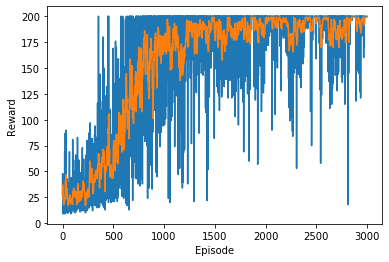

Varince of reward = 4152.068191


In [5]:
smoothed_rewards = pd.Series.rolling(pd.Series(all_rewards), 10).mean()
plt.plot(all_rewards)
plt.plot(avg_numsteps)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.show()
print('Varince of reward = {}'.format(np.var(all_rewards)))

In [9]:
df = pd.DataFrame()
df['rewards'] = all_rewards
df['mean10_rewards'] = avg_numsteps

In [11]:
df.to_csv('D:/Reinforcement_Learning/df_reinforce.csv', index=False)